In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('./clean_pls_predictors.xlsx')

In [5]:
X = data.iloc[:,8:]

In [6]:
X

,ADSCI-growing season,ADSCI-30 days prior to harvest,ADSCI-30 days prior to growing season end,Precip-growing season cm,Precip-30 days prior to harvest cm,Precip-30 days prior to growing season end cm,Accumlated Thermal Time-growing season C,Accumlated Thermal Time-30 days prior to harvest C,Accumlated Thermal Time-30 days prior to growing season end C,0-10 Soil pH,...,50-100 Site SOM,50-100 Site Soil total organic carbon,50-100 Site Total Soil nitrogen,50-100 Site Extractable P mg kg-1,50-100 Site Extractable K mg kg-1,50-100 Site Extractable Ca mg kg-1,50-100 Site Extractable Mg mg kg-1,50-100 Site Extractable S mg kg-1,50-100 Site BD g cm-3,Nitrogen Trt Categorical
0,0.00,0.0,0.0,77.9272,9.6520,11.0744,3226.944444,-86.666667,483.055556,5.83333,...,1.9,1.11,0.11,47.1,144,1613,154,17.1,1.69,1
1,0.00,0.0,0.0,77.9272,9.6520,11.0744,3226.944444,-86.666667,483.055556,5.80000,...,1.9,1.08,0.11,39.5,130,1686,177,17.4,1.66,1
2,0.00,0.0,0.0,77.9272,9.6520,11.0744,3226.944444,-86.666667,483.055556,5.83333,...,1.9,1.11,0.11,47.1,144,1613,154,17.1,1.69,-1
3,0.00,0.0,0.0,77.9272,9.6520,11.0744,3226.944444,-86.666667,483.055556,5.36667,...,1.6,0.75,0.08,11.3,75,1722,325,13.4,1.59,0
4,0.00,0.0,0.0,77.9272,9.6520,11.0744,3226.944444,-86.666667,483.055556,6.06667,...,1.9,1.08,0.11,39.5,130,1686,177,17.4,1.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.92,1.6,1.6,63.6270,11.5062,8.0264,3419.722222,155.000000,477.222222,5.16667,...,0.8,0.24,0.03,14.7,70,643,141,27.9,0.00,1
216,1.92,1.6,1.6,63.6270,11.5062,8.0264,3419.722222,155.000000,477.222222,5.26667,...,0.8,0.24,0.03,14.7,70,643,141,27.9,0.00,0
217,1.92,1.6,1.6,63.6270,11.5062,8.0264,3419.722222,155.000000,477.222222,5.16667,...,0.8,0.24,0.03,14.7,70,643,141,27.9,0.00,-1
218,1.92,1.6,1.6,63.6270,11.5062,8.0264,3419.722222,155.000000,477.222222,5.46667,...,0.8,0.24,0.03,14.7,70,643,141,27.9,0.00,0


# Affinity Propagation

In [7]:
from sklearn.cluster import AffinityPropagation

In [12]:
model = AffinityPropagation(0.75)

In [13]:
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

In [14]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [18]:
yhat

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
      dtype=int64)

# KMeans

In [26]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

In [27]:
model_KM = KMeans()

In [28]:
model_KM.fit(X)

KMeans()

In [29]:
model_KM.inertia_

120481451.5192415

In [30]:
# Very huge inertia

In [31]:
inertia = []
for i in range(1,51):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [32]:
inertia

[1969262074.9148903,
 1146130330.0819798,
 703392037.4976246,
 463355926.13416976,
 289312007.3394831,
 219267846.01252744,
 160937058.72488925,
 120481451.5192415,
 85451013.8889282,
 63970766.590791054,
 51385723.58239237,
 41503116.7343278,
 33234780.23764236,
 25904613.454161312,
 22053989.441106807,
 17832001.040964827,
 13933160.283881161,
 11188927.25562462,
 9099656.878130455,
 8531834.728311202,
 7918662.504784941,
 7402423.224135787,
 6900772.66043816,
 6358281.706134616,
 5854738.695279455,
 5378356.0019089375,
 4901989.259327166,
 4470913.4156734925,
 4073783.447898654,
 3721938.707755607,
 3370099.63890887,
 3018260.5700621326,
 2859571.95469953,
 2700883.3393369257,
 2545544.143289176,
 2386855.5279265717,
 2288033.4442883567,
 2191277.3606940215,
 1984969.6735550947,
 1936018.1648547086,
 1789000.215936088,
 1724586.7199581037,
 1611906.1822767358,
 1557286.7334412974,
 1535626.4461075286,
 1446352.8424960705,
 1337697.2653523155,
 1295150.6770445553,
 1240670.5794482066

Text(0, 0.5, 'Inertia')

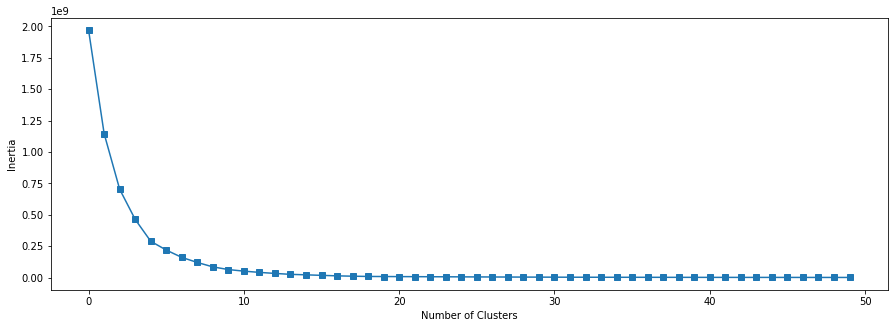

In [33]:
# Elbow method

plt.figure(figsize=(15,5))
plt.plot(inertia,marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

**Almost after 8th cluster the change in inertia almost saturated**.

**So we can consider best number of clusters are 8**

# Agglomarative Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
model = AgglomerativeClustering(n_clusters=8)

In [35]:
yhat = model.fit_predict(X)
clusters = np.unique(yhat)

In [36]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [37]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

In [56]:
model = DBSCAN()
yhat = model.fit_predict(X)
clusters = np.unique(yhat)

In [55]:
clusters

array([-1], dtype=int64)